In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install gdown

In [3]:
!gdown 14wjJDyVIoDcHTUJgglZZ2j_Ebu8fFJAJ

Downloading...
From: https://drive.google.com/uc?id=14wjJDyVIoDcHTUJgglZZ2j_Ebu8fFJAJ
To: /kaggle/working/data.zip
100%|██████████████████████████████████████| 2.34G/2.34G [00:35<00:00, 66.7MB/s]


In [4]:
import math
from PIL import Image, ImageDraw
#https://www.geeksforgeeks.org/python-pillow-a-fork-of-pil/

from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [5]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
   creating: data/images/201/
  inflating: data/images/201/frame0029_leftImg8bit.jpg  
  inflating: data/images/201/frame0299_leftImg8bit.jpg  
  inflating: data/images/201/frame0779_leftImg8bit.jpg  
  inflating: data/images/201/frame1019_leftImg8bit.jpg  
  inflating: data/images/201/frame1469_leftImg8bit.jpg  
  inflating: data/images/201/frame1979_leftImg8bit.jpg  
  inflating: data/images/201/frame2519_leftImg8bit.jpg  
  inflating: data/images/201/frame2819_leftImg8bit.jpg  
  inflating: data/images/201/frame3179_leftImg8bit.jpg  
  inflating: data/images/201/frame3749_leftImg8bit.jpg  
  inflating: data/images/201/frame4079_leftImg8bit.jpg  
   creating: data/images/202/
  inflating: data/images/202/frame0018_leftImg8bit.jpg  
  inflating: data/images/202/frame0389_leftImg8bit.jpg  
   creating: data/images/203/
  inflating: data/images/203/frame0165_leftImg8bit.jpg  
  inflating: data/images/203/frame0435_leftImg8b

In [6]:
import pathlib
img_object=pathlib.Path('data/images')
image_files=list(img_object.glob('*/*'))
image_files

[PosixPath('data/images/245/frame0719_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame2039_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0146_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0599_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame1009_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame1533_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0053_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame1319_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0386_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0839_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame2639_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame0266_leftImg8bit.jpg'),
 PosixPath('data/images/245/frame2399_leftImg8bit.jpg'),
 PosixPath('data/images/211/frame2343_leftImg8bit.jpg'),
 PosixPath('data/images/211/frame3588_leftImg8bit.jpg'),
 PosixPath('data/images/211/frame0858_leftImg8bit.jpg'),
 PosixPath('data/images/211/frame3869_leftImg8bit.jpg'),
 PosixPath('data/images/211/fra

In [7]:
mask_dir=pathlib.Path('data/mask')
mask_files=list(mask_dir.glob('*/*'))
mask_files

[PosixPath('data/mask/245/frame1533_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0599_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0146_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame1319_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame1009_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0266_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame2399_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0386_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0053_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0719_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame2639_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame2039_gtFine_polygons.json'),
 PosixPath('data/mask/245/frame0839_gtFine_polygons.json'),
 PosixPath('data/mask/211/frame3588_gtFine_polygons.json'),
 PosixPath('data/mask/211/frame1158_gtFine_polygons.json'),
 PosixPath('data/mask/211/frame0693_gtFine_polygons.json'),
 PosixPath('data/mask/211/frame2988_gtFi

In [8]:
print(len(mask_files))
print(len(image_files))

4008
4008


In [9]:
json_files=[]
for img in image_files:
    dir_list=str(img).split('/')
    img_name=str(img).split('/')[-1]
    
    #print(str(img).split('/')[-1])
    
    frame_name=img_name.split('_')[0]
    json_dir='data'+'/mask/'+dir_list[2]+'/'+ frame_name + '_gtFine_polygons.json'
    json_files.append(json_dir)

In [10]:
data_df=pd.DataFrame([image_files,json_files]).transpose()
data_df.loc[0][1]

'data/mask/245/frame0719_gtFine_polygons.json'

In [11]:
def return_file_names_df(root_dir):
    # write the code that will create a dataframe with two columns ['images', 'json']
    # the column 'image' will have path to images
    # the column 'json' will have path to json files
    img_object=pathlib.Path('data/images')
    image_files=list(img_object.glob('*/*'))
    image_files=[str(i) for i in image_files]
    json_files=[]
    
    for img in image_files:
        dir_list=str(img).split('/')
        img_name=str(img).split('/')[-1]
        #print(str(img).split('/')[-1])
        frame_name=img_name.split('_')[0]
        json_dir='data'+'/mask/'+dir_list[2]+'/'+ frame_name + '_gtFine_polygons.json'
        json_files.append(json_dir)
    data_df=pd.DataFrame([image_files,json_files]).transpose()
    data_df.columns=['images','json']
    return data_df

In [12]:
root_dir='data/images'
data_df = return_file_names_df(root_dir)
data_df.head()

,images,json
0,data/images/245/frame0719_leftImg8bit.jpg,data/mask/245/frame0719_gtFine_polygons.json
1,data/images/245/frame2039_leftImg8bit.jpg,data/mask/245/frame2039_gtFine_polygons.json
2,data/images/245/frame0146_leftImg8bit.jpg,data/mask/245/frame0146_gtFine_polygons.json
3,data/images/245/frame0599_leftImg8bit.jpg,data/mask/245/frame0599_gtFine_polygons.json
4,data/images/245/frame1009_leftImg8bit.jpg,data/mask/245/frame1009_gtFine_polygons.json


In [13]:
def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
            return False
    return True

In [14]:
grader_1(data_df)

True

In [15]:
data_df.shape

(4008, 2)

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

In [16]:
def return_unique_labels(data_df):
    # for each file in the column json
    #       read and store all the objects present in that file
    # compute the unique objects and return them
    # if open any json file using any editor you will get better sense of it
    unique_class=set()
    for files in tqdm(data_df['json']):
        f=open(files)
        data=json.load(f)
        for obj in data['objects']:
            unique_class.add(obj['label'])
    unique_labels=list(unique_class)
    return unique_labels

In [17]:
unique_labels = return_unique_labels(data_df)

100%|██████████| 4008/4008 [00:27<00:00, 147.65it/s]


In [18]:
len(unique_labels)

40

In [19]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [20]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [21]:
def get_poly(file):
    # this function will take a file name as argument
    
    # it will process all the objects in that file and returns
    
    # label: a list of labels for all the objects label[i] will have the corresponding vertices in vertexlist[i]
    # len(label) == number of objects in the image
    
    # vertexlist: it should be list of list of vertices in tuple formate 
    # ex: [[(x11,y11), (x12,y12), (x13,y13) .. (x1n,y1n)]
    #     [(x21,y21), (x22,y12), (x23,y23) .. (x2n,y2n)]
    #      .....
    #     [(xm1,ym1), (xm2,ym2), (xm3,ym3) .. (xmn,ymn)]]
    # len(vertexlist) == number of objects in the image
    
    # * note that label[i] and vertextlist[i] are corresponds to the same object, one represents the type of the object
    # the other represents the location
    
    # width of the image
    # height of the image
    f=open(file)
    data=json.load(f)
    h=data['imgHeight']
    w=data['imgWidth']
    label=list()
    vertexlist=list()
    for obj in data['objects']:
        label.append(obj['label']) 
        vertexlist.append([tuple(i) for i in obj['polygon']])
    
    #print(w,h,len(set(label)), len(vertexlist))
    #print(isinstance(vertexlist,list), isinstance(vertexlist[0],list), isinstance(vertexlist[0][0],tuple))
    return w, h, label, vertexlist

In [22]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

(28, 28, 3)
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 

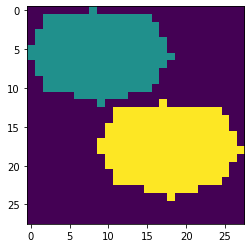

In [23]:
import math 
from PIL import Image, ImageDraw 
from PIL import ImagePath  
side=8
x1 = [ ((math.cos(th) + 1) *9, (math.sin(th) + 1) * 6) for th in [i * (2 * math.pi) / side for i in range(side)] ]
x2 = [ ((math.cos(th) + 2) *9, (math.sin(th) + 3) *6) for th in [i * (2 * math.pi) / side for i in range(side)] ]

img = Image.new("RGB", (28,28))
img1 = ImageDraw.Draw(img)
# please play with the fill value
# writing the first polygon
img1.polygon(x1, fill =10)
# writing the second polygon
img1.polygon(x2, fill =20)

img=np.array(img)
# note that the filling of the values happens at the channel 1, so we are considering only the first channel here
plt.imshow(img[:,:,0])
print(img.shape)
print(img[:,:,0]//10)
im = Image.fromarray(img[:,:2])
im.save("test_image.png")

In [24]:
def compute_masks(data_df):
    # after you have computed the vertexlist plot that polygone in image like this
    output_files=[]
    for json_files in tqdm(data_df['json']):
        f=json_files.split('.')[0]
        file_name=f.split('/')
        #print(file_name[8])
        w, h, label, vertexlist=get_poly(json_files)
        img = Image.new("RGB", (w, h))
        img1 = ImageDraw.Draw(img)
        for i in range(len(vertexlist)):
            if len(vertexlist[i])>=2:
                img1.polygon(vertexlist[i], fill = label_clr[label[i]])
        if os.path.exists('data'+'/output/'+file_name[2]):
            #print(file_name[8])
            img=np.array(img)
            im=Image.fromarray(img[:,:,0])
            im.save('data'+'/output/'+file_name[2]+'/'+file_name[-1]+'.jpg')
            del img
        else:
            os.makedirs('data'+'/output/'+file_name[2])
            img=np.array(img)
            im=Image.fromarray(img[:,:,0])
            im.save('data'+'/output/'+file_name[2]+'/'+file_name[-1]+'.jpg')
            del img
        output_files.append('data'+'/output/'+file_name[2]+'/'+file_name[-1]+'.jpg')
    
    # after drawing all the polygons that we collected from json file, 
    # you need to store that image in the folder like this "data/output/scene/framenumber_gtFine_polygons.png"
    
    # after saving the image into disk, store the path in a list
    # after storing all the paths, add a column to the data_df['mask'] ex: data_df['mask']= mask_paths
    data_df['mask']=output_files
    
    
    
    return data_df

In [25]:
data_df = compute_masks(data_df)


100%|██████████| 4008/4008 [02:45<00:00, 24.26it/s]


In [26]:
#daving the final dataframe to a csv file
data_df.to_csv('data/preprocessed_data.csv', index=False)

In [27]:
import pandas as pd
data=pd.read_csv('data/preprocessed_data.csv', delimiter=',')

In [28]:
data

,images,json,mask
0,data/images/245/frame0719_leftImg8bit.jpg,data/mask/245/frame0719_gtFine_polygons.json,data/output/245/frame0719_gtFine_polygons.jpg
1,data/images/245/frame2039_leftImg8bit.jpg,data/mask/245/frame2039_gtFine_polygons.json,data/output/245/frame2039_gtFine_polygons.jpg
2,data/images/245/frame0146_leftImg8bit.jpg,data/mask/245/frame0146_gtFine_polygons.json,data/output/245/frame0146_gtFine_polygons.jpg
3,data/images/245/frame0599_leftImg8bit.jpg,data/mask/245/frame0599_gtFine_polygons.json,data/output/245/frame0599_gtFine_polygons.jpg
4,data/images/245/frame1009_leftImg8bit.jpg,data/mask/245/frame1009_gtFine_polygons.json,data/output/245/frame1009_gtFine_polygons.jpg
...,...,...,...
4003,data/images/239/frame0401_leftImg8bit.jpg,data/mask/239/frame0401_gtFine_polygons.json,data/output/239/frame0401_gtFine_polygons.jpg
4004,data/images/239/frame0091_leftImg8bit.jpg,data/mask/239/frame0091_gtFine_polygons.json,data/output/239/frame0091_gtFine_polygons.jpg
4005,data/images/401/frame0179_leftImg8bit.jpg,data/mask/401/frame0179_gtFine_polygons.json,data/output/401/frame0179_gtFine_polygons.jpg
4006,data/images/401/frame0984_leftImg8bit.jpg,data/mask/401/frame0984_gtFine_polygons.json,data/output/401/frame0984_gtFine_polygons.jpg


In [29]:
from sklearn.model_selection import train_test_split
train_1, test=train_test_split(data, test_size=0.2)
train, validation=train_test_split(train_1, test_size=0.2)

In [30]:
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [31]:
%env SM_FRAMEWORK=tf.keras
import tensorflow as tf
from tensorflow.keras.utils import get_source_inputs

import segmentation_models as sm

import segmentation_models as sm
from segmentation_models import Unet

tf.keras.backend.set_image_data_format('channels_last')

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [32]:
model_1 = Unet('resnet50', encoder_weights='imagenet', classes=21, activation='softmax', input_shape=(512,1024,3),encoder_freeze = True)

2023-01-31 17:17:52.228914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 17:17:52.320779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 17:17:52.321710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-31 17:17:52.323480: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94601216/94592056 [==============================] - 3s 0us/step


In [33]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}
labels=sorted(list(set(label_clr.values())))

In [34]:
# import imgaug.augmenters as iaa
# For the assignment choose any 4 augumentation techniques
# check the imgaug documentations for more augmentations
import imgaug.augmenters as iaa

aug2 = iaa.Fliplr(1)
aug3 = iaa.Flipud(1)
aug4 = iaa.Emboss(alpha=(1), strength=1)
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))

In [35]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()
    
def normalize_image(mask):
    mask = mask/255
    return mask

class Dataset:
    # we will be modifying this CLASSES according to your data/problems
    CLASSES = label_clr.values()
    
    # the parameters needs to changed based on your requirements
    # here we are collecting the file_names because in our dataset, both our images and maks will have same file name
    # ex: fil_name.jpg   file_name.mask.jpg
    def __init__(self,image_dir, mask_image_dir, classes):
        
        
        self.images_fps   = image_dir
        # the paths of segmentation images
        self.masks_fps    = mask_image_dir
        # giving labels for each class
        self.class_values = classes
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        image=cv2.resize(image, (1024,512),interpolation=cv2.INTER_AREA)
        image=image/255
        
        mask  = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)
        mask=cv2.resize(mask, (1024,512),interpolation=cv2.INTER_AREA)
        
        image_masks = [(mask == v) for v in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float32')
   
        a = np.random.uniform()
        if a<0.2:
            image = image
            image_mask = image_mask
        elif a<0.4:
            image = aug3.augment_image(image)
            image_mask = aug3.augment_image(image_mask)
        elif a<0.6:
            image = aug4.augment_image(image)
            image_mask = aug4.augment_image(image_mask)
        elif a<0.8:
            image = aug5.augment_image(image)
            image_mask = image_mask
        else:
            image = aug6.augment_image(image)
            image_mask = aug6.augment_image(image_mask)
            
        return image, image_mask
    def __len__(self):
        return (len(self.images_fps))
    
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [36]:
# Dataset for train images
CLASSES = labels
train_mask_image_dir=train['mask'].values
train_image_dir=train['images'].values

test_mask_image_dir=test['mask'].values
test_image_dir=test['images'].values

validation_mask_image_dir=validation['mask'].values
validation_image_dir=validation['images'].values

train_dataset = Dataset(train_image_dir,train_mask_image_dir, classes=CLASSES)
test_dataset  = Dataset(test_image_dir,test_mask_image_dir, classes=CLASSES)
validation_dataset  = Dataset(validation_image_dir,validation_mask_image_dir, classes=CLASSES)

BATCH_SIZE=3

train_dataloader = Dataloder(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = Dataloder(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_dataloader = Dataloder(validation_dataset, batch_size=BATCH_SIZE, shuffle=True)


print(train_dataloader[0][0].shape)
assert train_dataloader[0][0].shape == (BATCH_SIZE,512,1024,3)
assert train_dataloader[0][1].shape == (BATCH_SIZE,512,1024,21)

(3, 512, 1024, 3)


In [37]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet

optim = tf.keras.optimizers.Adam(0.0001)
path='data/model_1.hdf5'
checkpoint=tf.keras.callbacks.ModelCheckpoint(filepath=path, monitor= 'val_loss',
    save_best_only = True,
    mode='auto')
focal_loss = sm.losses.cce_dice_loss

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# or total_loss = sm.losses.categorical_focal_dice_loss 

model_1.compile(optim, focal_loss, metrics=[iou_score])

In [38]:
model_1.fit(train_dataloader, epochs=50, validation_data=validation_dataloader, callbacks=checkpoint)

2023-01-31 17:18:03.144741: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18874368 exceeds 10% of free system memory.
2023-01-31 17:18:03.165886: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 132120576 exceeds 10% of free system memory.
2023-01-31 17:18:03.370128: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50


2023-01-31 17:18:09.871602: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18874368 exceeds 10% of free system memory.
2023-01-31 17:18:09.882480: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 132120576 exceeds 10% of free system memory.
2023-01-31 17:18:11.141840: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 18874368 exceeds 10% of free system memory.
2023-01-31 17:18:11.331885: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


854/854 [==============================] - 881s 1s/step - loss: 0.8508 - iou_score: 0.1547 - val_loss: 0.8454 - val_iou_score: 0.1692


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
854/854 [==============================] - 869s 1s/step - loss: 0.6996 - iou_score: 0.2685 - val_loss: 0.6563 - val_iou_score: 0.3078
Epoch 3/50
854/854 [==============================] - 869s 1s/step - loss: 0.6463 - iou_score: 0.3157 - val_loss: 0.6309 - val_iou_score: 0.3340
Epoch 4/50
854/854 [==============================] - 862s 1s/step - loss: 0.6198 - iou_score: 0.3400 - val_loss: 0.6063 - val_iou_score: 0.3534
Epoch 5/50
854/854 [==============================] - 865s 1s/step - loss: 0.6019 - iou_score: 0.3573 - val_loss: 0.5907 - val_iou_score: 0.3701
Epoch 6/50
854/854 [==============================] - 865s 1s/step - loss: 0.5876 - iou_score: 0.3711 - val_loss: 0.5892 - val_iou_score: 0.3701
Epoch 7/50
854/854 [==============================] - 877s 1s/step - loss: 0.5777 - iou_score: 0.3786 - val_loss: 0.5756 - val_iou_score: 0.3862
Epoch 8/50
854/854 [==============================] - 870s 1s/step - loss: 0.5701 - iou_score: 0.3874 - val_loss: 0.5764 - val_iou

KeyboardInterrupt: 

In [41]:
model_1.evaluate(test_dataloader)

267/267 [==============================] - 205s 769ms/step - loss: 0.3927 - iou_score: 0.5604


[0.3926835358142853, 0.5603872537612915]